# VSA Similarity Fundamental
Here we discuss some mathematical derivations about the expected similarities. This is because it is fundamental to understand the difference when we use Hamming distance and cosine similarities.

In [38]:
# Import library
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Gets directory where script was launched from
script_dir = os.getcwd()  
script_dir = script_dir + "/../lib/"
print(f"VSA Library: {script_dir}")

# Add the directory to Python's search path
sys.path.append(script_dir)  

import vsa as vsa
import vsa_func as vsaf
import vsa_profile as vsap

VSA Library: \\wsl.localhost\Ubuntu\home\rantonio\chronomatica\vsa/../lib/


## Hamming Distance
- Hamming distance is simply the measure of bit-wise dissimilarity. It is most efficient when we use binary hypervectors (HVs).
- Mathematically it is simply the sum of XOR'd elements:

$$ H(A,B) = \Sigma_{i=1}^{D} A_i \otimes B_i $$

- Generally, HVs have equal 1s and 0s or $p=0.5$ which is a Bernoulli i.i.d. Such that:

$$ P(A=1) = P(A=0) = P(B=1) = P(B=0) = 0.5 $$

- Then, the probability of mismatch is:

$$ P(A_i \neq B_i) = P(A_i=0, B_i=1) + P(A_i=1, B_i=0) = 0.25 + 0.25 = 0.5 \rightarrow \textrm{Bernoulli}(0.5) $$


- The expectation is then:

$$ E[\textrm{H}(A,B)] = D \cdot E[A \otimes B] = D \cdot 0.5 = \frac{D}{2} $$

- Variance is then:

$$ \sigma^2(H(A,B)) = D \cdot \sigma^2(A \otimes B)$$

- For every $A_i \otimes B_i$ we have $\sigma^2(A_i \otimes B_i) = 0.5 \cdot (1-0.5) = 0.25$ and by definition of variance we arrive at:

$$ \sigma^2(H(A,B)) = D \cdot 0.25 = \frac{D}{4} \rightarrow \sigma = \frac{\sqrt{D}}{2} $$

- We can easily show this experiment below. Feel free to change the dimension size.

In [19]:
HV_DIM = 10000
NUM_TRIALS = 10000

# Ideal measurement
binary_mean = HV_DIM / 2
binary_var = HV_DIM / 4
binary_std = np.sqrt(binary_var)

print(f"Ideal mean Hamming distance: {binary_mean}")
print(f"Ideal var Hamming distance: {binary_var}")
print(f"Ideal std. dev Hamming distance: {binary_std}")
print("")

# Empirical measurement
trial_scores = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):
    # Generate the hypervectors
    hv_A = vsa.gen_rand_idx_hv(HV_DIM, type="binary")
    hv_B = vsa.gen_rand_idx_hv(HV_DIM, type="binary")

    # Do a hamming distance
    hv_Ham = vsa.hv_ham(hv_A, hv_B, normalize=False)
    trial_scores[i] = hv_Ham

print(f"Empirical mean Hamming distance: {np.mean(trial_scores)}")
print(f"Empirical var Hamming distance: {np.var(trial_scores)}")
print(f"Empirical std. dev Hamming distance: {np.std(trial_scores)}")


Ideal mean Hamming distance: 5000.0
Ideal var Hamming distance: 2500.0
Ideal std. dev Hamming distance: 50.0

Empirical mean Hamming distance: 4999.1014
Empirical var Hamming distance: 2528.2201180399998
Empirical std. dev Hamming distance: 50.28140926863526


- To compare the distribution spread we plot it in Python

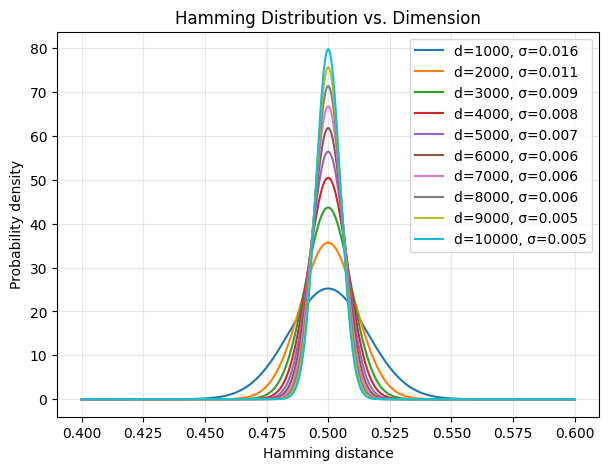

In [45]:
HV_DIM_LIST = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
x = np.linspace(0.4, 0.6, 1000)  # x-axis range for cosine similarity

plt.figure(figsize=(7,5))
for D in HV_DIM_LIST:
    mu = (D/2)/D
    sigma = np.sqrt(D)/ 2 / D
    pdf = norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=f"d={D}, σ={sigma:.3f}")

# Formatting
plt.title("Hamming Distribution vs. Dimension")
plt.xlabel("Hamming distance")
plt.ylabel("Probability density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Cosine Similarity
- Cosine similarity is the most common measure for both similarity and direction. Unlike Hamming distance, which is analogous to just the L1 norm, cosine similarity normalizes the result while considering the direction. Given by:

$$ \cos(A,B) = \frac{A \cdot B}{ ||A|| \cdot ||B||} $$


- Where $||\cdot||$ operator is L2 norm of each vector.
- Shifting from binary to bipolar are the same representations, but the cosine similarity suits the bipolar better even though the dot product is almost as good as representing the Hamming distance.
- Consider the case when we use the bipolar range $[-1, +1]$

$$ P(A=1) = P(A=-1) = P(B=1) = P(B=-1) = 0.5 $$

- Then each pair of $(A_i,B_i)$ is likely:

$$ P(A_i \neq B_i) = P(A_i = B_i) = 0.5 $$

- Which leads to:

$$ E[A_i \cdot B_i] = (0.5)(+1) + (0.5)(-1) = 0 \rightarrow E[A\cdot B] = 0$$

- Now each vector has the same L2 norms:

$$ ||A|| = ||B|| = \sqrt{D}$$

- Filling in the cosine similarity equation yields:

$$ \cos(A,B) = \frac{A \cdot B}{ ||A|| \cdot ||B||} = \frac{A \cdot B}{D}$$

- FInally results in:

$$ E[\cos (A,B)] = 0$$

- For calculating variance let's re-state some things. Let $X_i = A_i \cdot B_i$ then $X_i \in {-1,+1}$ with $E[X_i] = 0$ and $\sigma^2(X_i)=1$

- Plugging into the cosine similarity yields:

$$ \cos(A,B) = \frac{A \cdot B}{ ||A|| \cdot ||B||} = \frac{1}{D} \Sigma_{i=1}^{D} X_i$$

- Then we measure the variance as:

$$ \sigma^2 [\cos(A,B)] = \sigma^2 \left[ \frac{1}{D} \Sigma_{i=1}^{D} X_i\right ] = \frac{1}{d^2} \Sigma_{i=1}^{D} \sigma^2 (X_i) = \frac{1}{D} $$

- Then equivalently $\sigma = 1/\sqrt{D}$
- By definition of *central limit theorem* $\cos (A,B)$ approximates $N(0,1/D) for large D$
- The code below is a proof of it.

In [20]:
HV_DIM = 10000
NUM_TRIALS = 10000

# Ideal measurement
binary_mean = 0
binary_var = 1 / HV_DIM
binary_std = np.sqrt(binary_var)

print(f"Ideal mean cosine distance: {binary_mean}")
print(f"Ideal var cosine distance: {binary_var}")
print(f"Ideal std. dev cosine distance: {binary_std}")
print("")

# Empirical measurement
trial_scores = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):
    # Generate the hypervectors
    hv_A = vsa.gen_rand_idx_hv(HV_DIM, type="bipolar")
    hv_B = vsa.gen_rand_idx_hv(HV_DIM, type="bipolar")

    # Do a cosine distance
    cos_score = vsa.hv_cos(hv_A, hv_B)
    trial_scores[i] = cos_score

print(f"Empirical mean cosine distance: {np.mean(trial_scores)}")
print(f"Empirical var cosine distance: {np.var(trial_scores)}")
print(f"Empirical std. dev cosine distance: {np.std(trial_scores)}")


Ideal mean cosine distance: 0
Ideal var cosine distance: 0.0001
Ideal std. dev cosine distance: 0.01

Empirical mean cosine distance: -7.931999999999999e-05
Empirical var cosine distance: 9.87351963376e-05
Empirical std. dev cosine distance: 0.009936558576167102


- This time we do the same distribution for bipolar

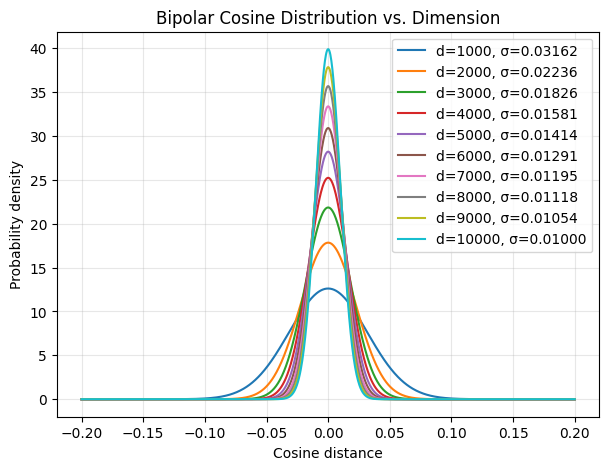

In [52]:
HV_DIM_LIST = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
x = np.linspace(-0.2, 0.2, 1000)  # x-axis range for cosine similarity

plt.figure(figsize=(7,5))
for D in HV_DIM_LIST:
    mu = 0
    sigma = 1/ np.sqrt(D)
    pdf = norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=f"d={D}, σ={sigma:.5f}")

# Formatting
plt.title("Bipolar Cosine Distribution vs. Dimension")
plt.xlabel("Cosine distance")
plt.ylabel("Probability density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Cosine Similarity for Integers
- For two independent $D$-length vectors $A$ and $B$ whose entries are i.i.d. **integers** drawn from some range $[-Q,+Q]$ (e.g., $[-128,127]$) we can get large-$D$ formulas for cosine similarity:

$$\cos (A,B) = \frac{\Sigma_{i=1}^{D} A_iB_i}{\sqrt{\Sigma_{i=1}^{D}A_i^2}\sqrt{\Sigma_{i=1}^{D}B_i^2}} $$

- Then let every element have $\mu = E[X]$ and second moment $m_2 = E[X^2] = \sigma^2 + \mu^2$
- The expectation and variance for asymptotic large-$D$ is:

$$E[\cos(A,B)] \approx \frac{\mu^2}{m_2} = \frac{\mu^2}{\sigma^2 + \mu^2} $$

$$\sigma^2(\cos(A,B)) \approx \frac{1}{D} \left( 1 - \left( \frac{\mu^2}{m_2} \right)^2\right) = \frac{1}{D} \left(1-E[\cos (A,B)]^2 \right) $$

- Some things to note:
  - The numerator $\Sigma A_i B_i$ has mean $D \mu^2$ and variance $\sigma^2 (m_2^2 - \mu^2)$
  - The denominator concentrates to $Dm_2$ by law of large numbers.

- Let's try some examples. First, consider the case when the range is $[a,b] = [-128, 127]$
  - Then we have mean:
  $$ \mu = \frac{a+b}{2} =\frac{-128 + 127}{2} = - \frac{1}{2} $$
  - Then we have variance:
  $$ \sigma^2 = \frac{(b-a)^2}{12} =\frac{n^2-1}{12} = \frac{256^2-1}{12} = \frac{65535}{12} \approx 5461.25$$
  - The second moment is then:
  $$m_2 = \sigma^2 + \mu^2 \approx 5461.25 + 0.25 = 5461.5 $$
- Let's look at the code below to see how it fairs

In [35]:
HV_DIM = 10000
NUM_TRIALS = 10000

# Given real range
min_range = -128
max_range = 127

# Ideal measurement
element_mean = (min_range + max_range) / 2
element_var = ((max_range - min_range + 1) ** 2 - 1) / 12
element_second_moment = element_var + element_mean ** 2

# Expected cosine similarity between two vectors
integer_mean = (element_mean**2) / (element_var + element_mean ** 2)
integer_var = (1/HV_DIM)*(1-integer_mean**2)
integer_std = np.sqrt(integer_var)

print(f"Ideal mean cosine distance: {integer_mean}")
print(f"Ideal var cosine distance: {integer_var}")
print(f"Ideal std. dev cosine distance: {integer_std}")
print("")

# Empirical measurement
trial_scores = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):
    # Generate the hypervectors
    hv_A = vsa.gen_hv(HV_DIM, type="integer", int_min=-128, int_max=127)
    hv_B = vsa.gen_hv(HV_DIM, type="integer", int_min=-128, int_max=127)

    # Do a cosine distance
    cos_score = vsa.hv_cos(hv_A, hv_B)
    trial_scores[i] = cos_score

print(f"Empirical mean cosine distance: {np.mean(trial_scores)}")
print(f"Empirical var cosine distance: {np.var(trial_scores)}")
print(f"Empirical std. dev cosine distance: {np.std(trial_scores)}")


Ideal mean cosine distance: 4.577497024626934e-05
Ideal var cosine distance: 9.999999979046521e-05
Ideal std. dev cosine distance: 0.009999999989523261

Empirical mean cosine distance: 4.980331890897538e-05
Empirical var cosine distance: 0.00010069493653286479
Empirical std. dev cosine distance: 0.010034686668395023


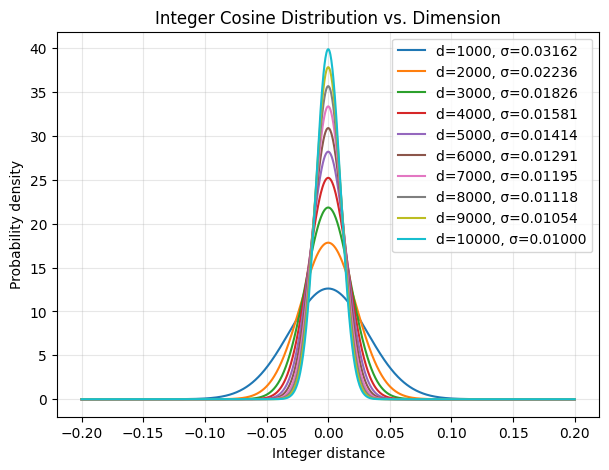

In [51]:
HV_DIM_LIST = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
x = np.linspace(-0.2, 0.2, 1000)  # x-axis range for cosine similarity

plt.figure(figsize=(7,5))
for D in HV_DIM_LIST:
    # Given real range
    min_range = -128
    max_range = 127

    # Ideal measurement
    element_mean = (min_range + max_range) / 2
    element_var = ((max_range - min_range + 1) ** 2 - 1) / 12

    # Expected cosine similarity between two vectors
    integer_mean = (element_mean**2) / (element_var + element_mean ** 2)
    integer_var = (1/D)*(1-integer_mean**2)
    integer_std = np.sqrt(integer_var)

    pdf = norm.pdf(x, integer_mean, integer_std)
    plt.plot(x, pdf, label=f"d={D}, σ={integer_std:.5f}")

# Formatting
plt.title("Integer Cosine Distribution vs. Dimension")
plt.xlabel("Integer distance")
plt.ylabel("Probability density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Cosine Similarity for Real Numbers
- We can apply the same formula for integers to real numbers. Suppose we represent our HVs $A$ and $B$ in the continuous range of $[-1,+1]$ instead of discrete samples. Applying the formula results in:
- Statistic per element:
    - $\mu = \frac{a+b}{2} = \frac{-1 + 1}{2} = 0$
    - $\sigma^2 = \frac{(b-a)^2}{12} = \frac{(1 - (-1))^2}{12} = \frac{1}{3}$
- Hypervector statistic for $\cos (A,B)$
$$E[\cos(A,B)] \approx \frac{\mu^2}{\mu^2 + \sigma^2} = 0$$
$$\sigma^2 [\cos (A,B)] = \frac{1}{D} \left(1- E[\cos(A,B)]\right)^2 = \frac{1}{D} $$
- The code below is an example or proof:

In [37]:
HV_DIM = 10000
NUM_TRIALS = 10000

# Given real range
min_range = -1
max_range = 1

# Ideal measurement
element_mean = (min_range + max_range) / 2
element_var = ((max_range - min_range) ** 2 ) / 12
element_second_moment = element_var + element_mean ** 2

# Expected cosine similarity between two vectors
real_mean = (element_mean**2) / (element_var + element_mean ** 2)
real_var = (1/HV_DIM)
real_std = np.sqrt(real_var)

print(f"Ideal mean cosine distance: {real_mean}")
print(f"Ideal var cosine distance: {real_var}")
print(f"Ideal std. dev cosine distance: {real_std}")
print("")

# Empirical measurement
trial_scores = np.zeros(NUM_TRIALS)

for i in range(NUM_TRIALS):
    # Generate the hypervectors
    hv_A = vsa.gen_hv(HV_DIM, type="real")
    hv_B = vsa.gen_hv(HV_DIM, type="real")

    # Do a cosine distance
    cos_score = vsa.hv_cos(hv_A, hv_B)
    trial_scores[i] = cos_score

print(f"Empirical mean cosine distance: {np.mean(trial_scores)}")
print(f"Empirical var cosine distance: {np.var(trial_scores)}")
print(f"Empirical std. dev cosine distance: {np.std(trial_scores)}")


Ideal mean cosine distance: 0.0
Ideal var cosine distance: 0.0001
Ideal std. dev cosine distance: 0.01

Empirical mean cosine distance: -3.274035040781542e-05
Empirical var cosine distance: 0.0001003847312847181
Empirical std. dev cosine distance: 0.010019218097472382


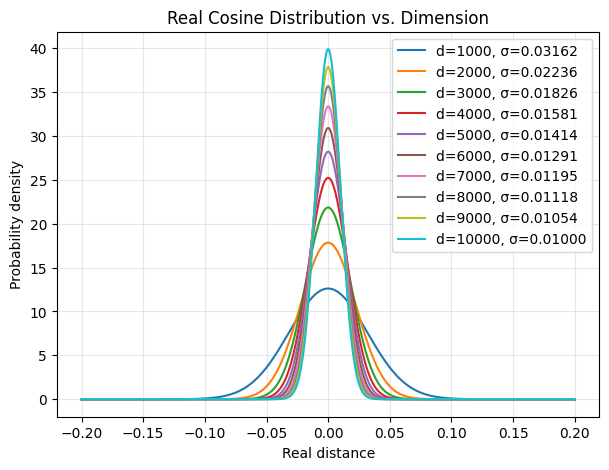

In [54]:
HV_DIM_LIST = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
x = np.linspace(-0.2, 0.2, 1000)  # x-axis range for cosine similarity

plt.figure(figsize=(7,5))
for D in HV_DIM_LIST:
    # Given real range
    min_range = -1
    max_range = 1

    # Ideal measurement
    element_mean = (min_range + max_range) / 2
    element_var = ((max_range - min_range + 1) ** 2 - 1) / 12

    # Expected cosine similarity between two vectors
    integer_mean = (element_mean**2) / (element_var + element_mean ** 2)
    integer_var = (1/D)*(1-integer_mean**2)
    integer_std = np.sqrt(integer_var)

    pdf = norm.pdf(x, integer_mean, integer_std)
    plt.plot(x, pdf, label=f"d={D}, σ={integer_std:.5f}")

# Formatting
plt.title("Real Cosine Distribution vs. Dimension")
plt.xlabel("Real distance")
plt.ylabel("Probability density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Conclusion
- It would appear that in theory, using Hamming and Cosine similarities yields different results but because they are compared in dfifferent spaces.
- Hamming is only applicable for binary elements and cosine is not (subjectively) suitable as it only encompasses the positive quadrant space.
- Cosine is universal for bipolar, integers, and real-numbered implementations.
- For the diferent data types, it appears the distribution are the same regardless of type.